In [37]:
!git add lda.ipynb
!git commit -m "new"
!git push

[master 5fd1380] new
 1 file changed, 77 insertions(+), 7 deletions(-)
Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects:

In [5]:
!curl -O http://www.cs.princeton.edu/~blei/lda-c/ap.tgz
!tar xzf ap.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2857k  100 2857k    0     0  1395k      0  0:00:02  0:00:02 --:--:-- 1395k


In [7]:
# test

In [9]:
from gensim import corpora, models, matutils

In [13]:
corpus = corpora.BleiCorpus('ap/ap.dat', 'ap/vocab.txt')

In [16]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word)

In [21]:
doc = corpus.docbyoffset(0)

In [39]:
sum([y for x,y in model[doc]])

0.98824999999999985

In [29]:
len(model[doc])

7

In [31]:
v_topic = [len(model[doc]) for doc in corpus]

In [32]:
%matplotlib inline

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([  17.,   58.,   84.,  133.,  147.,  179.,  194.,  220.,  211.,
         203.,  157.,  161.,    0.,  135.,  105.,   78.,   55.,   38.,
          38.,   12.,    9.,    5.,    2.,    1.,    4.]),
 array([  1.  ,   1.92,   2.84,   3.76,   4.68,   5.6 ,   6.52,   7.44,
          8.36,   9.28,  10.2 ,  11.12,  12.04,  12.96,  13.88,  14.8 ,
         15.72,  16.64,  17.56,  18.48,  19.4 ,  20.32,  21.24,  22.16,
         23.08,  24.  ]),
 <a list of 25 Patch objects>)

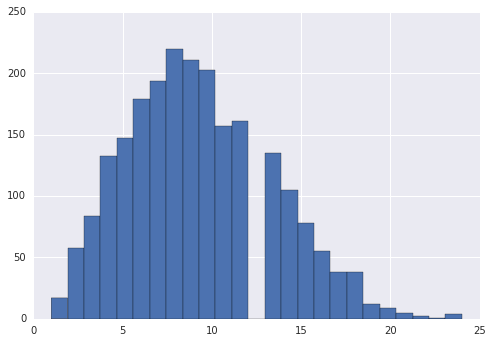

In [36]:
import seaborn
import matplotlib.pyplot as plt

plt.hist(v_topic, bins=25)

In [ ]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1)
v_topic = [len(model[doc]) for doc in corpus]